
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">📊 Predicción de precios de viviendas en CABA</h1>
<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;"></h3>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center;">El objetivo del proyecto es aplicar diferentes modelos de aprendizaje automatico a un set de datos de propiedades en venta, con el objetivo de para predecir el precio de nuevas viviendas.</p>
    
 <p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Autor: Patricio Garcia</p>



    
</div>




<img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/Mapa-CABA-Barrios-Nombres.svg" width="500px">



<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
        <h2 style="font-family: 'Verdana'; color: #3A405A;">🔍 Información sobre los datos</h2>
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">El dataset fue tomado de los datos publicados por la ciudad de Buenos Aires. El mismo contiene información sobre propiedades en venta durante el año 2016.
    
  <p style="font-size: 10px; font-family: 'Verdana'; color: #3A405A;"></p>
</div>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Descripción de datasaet</h3>

- **Fuente**: https://data.buenosaires.gob.ar/dataset/departamentos-venta/resource/juqdkmgo-7031-resource
- **Variables**:
  - `CALLE`: Calle de la vivienda.
  - `NUMERO`: Número de la vivienda.
  - `OPERACION`: Tipo de operación (todas son venta).
  - `TIPO`: Tipo de propiedad.
  - `M2`: Area total (cubierto y descubierto) de la vivienda en metros cuadrados.
  - `M2CUB`: Area total cubierta de la vivienda en metros cuadrados.
  - `PRECIOTEXT`: Precio en USD con formato para la web.
  - `PRECIOARS`: Precio en ARS.
  - `PRECIOARSM`: Precio en ARS por metro cuadrado.
  - `DOLARES`: Precio en USD.
  - `'U_S_M2`: Precio en USD por metro cuadrado.
  - `AMBIENTES`: Cantidad de ambientes.
  - `ANTIGUEDAD`: Antiguedad en años de la propiedad.
  - `BAÑOS`: Cantidad de baños de la propiedad.
  - `DIRECCION`: Dirección de la propiedad (calle y número).
  - `LOCATION`: Dirección y en algunas ocasiones el barrio.
  - `PUBLICADO`: Fecha de publicación.
  - `PROCESADO`: Fecha de procesamiento.
  - `URL`: Link del sitio donde fue publicado.
  - `NOTA`: Nota adicional.
  - `DIRECCION_NORMALIZADA`: Dirección normalizada.
  - `BARRIO`: Barrio.
  - `COMUNA`: Comuna.
  - `CODIGO_POSTAL`: Código postal.
  - `CODIGO_POSTAL_ARGENTINO`: Código postal (Código postal + letras)
  - `LATITUD`: Latitud de vivienda.
  - `LONGITUD`: Longitud de vivienda.
  





<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">📊 Importación de librerias y lectura de datos</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Se importan las librerias a utilizar durante el proyecto, se leen y guardan los datos.</p>
</div>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

Se abre y guarda el dataset

In [27]:
raw_data = pd.read_excel(r'departamentos-en-venta-2016.xlsx')
#raw_data = pd.read_excel(r'C:\Users\usuario\Desktop\Data Science\Master\5.Aprendizaje automatico\Trabajo final\departamentos-en-venta-2016.xlsx')
# raw_data = pd.read_excel(r'C:\Users\desar\Desktop\Pato\departamentos-en-venta-2016.xlsx')
raw_data

,CALLE,NUMERO,ID_ZONAPRO,OPERACION,TIPO,M2,M2CUB,PRECIOTEXT,PRECIOARS,PRECIOARSM,...,URL,REVISION,NOTA,DIRECCION_NORMALIZADA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD
0,GUATEMALA,5574.0,42408691,VTA,DTO,57,50,U$S 170.150,2977625,59553,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,NaN,NaN,GUATEMALA 5574,PALERMO,COMUNA 14,1425.0,C1425BVH,-34.580581,-58.431758
1,ZAPATA,300.0,42408710,VTA,DTO,46,46,U$S 118.650,2076375,45139,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,NaN,NaN,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609
2,ZAPATA,300.0,42518390,VTA,DTO,61,56,U$S 181.470,3175725,56709,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42518...,NaN,NaN,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609
3,ZAPATA,300.0,42518402,VTA,DTO,140,76,U$S 320.000,5600000,73684,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42518...,NaN,NaN,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609
4,"JUSTO, JUAN B. AV.",2300.0,42621693,VTA,DTO,39,33,U$S 82.116,1437030,43546,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42621...,NaN,NaN,"JUSTO, JUAN B. AV. 2300",VILLA CRESPO,COMUNA 15,1414.0,C1414CWY,-34.592984,-58.441542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7559,NaN,NaN,42302009,VTA,DTO,37,32,U$S 84.700,1482250,0,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7560,NaN,NaN,42302010,VTA,DTO,44,44,U$S 99.000,1732500,0,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7561,NaN,NaN,42302011,VTA,DTO,45,40,U$S 95.220,1666350,0,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7562,NaN,NaN,42302012,VTA,DTO,44,39,U$S 95.220,1666350,0,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se muestran las columnas del dataset.

In [28]:
raw_data.columns

Index(['CALLE', 'NUMERO', 'ID_ZONAPRO', 'OPERACION', 'TIPO', 'M2', 'M2CUB',
       'PRECIOTEXT', 'PRECIOARS', 'PRECIOARSM', 'DOLARES', 'U_S_M2',
       'AMBIENTES', 'ANTIGUEDAD', 'BAÑOS', 'DIRECCION', 'LOCATION',
       'PUBLICADO', 'PROCESADO', 'URL', 'REVISION', 'NOTA',
       'DIRECCION_NORMALIZADA', 'BARRIO', 'COMUNA', 'CODIGO_POSTAL',
       'CODIGO_POSTAL_ARGENTINO', 'LATITUD', 'LONGITUD'],
      dtype='object')

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Limpieza y preprocesamiento de datos</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Se realizan diversos pasos: <br>
    - Eliminación de columnas que no aportan información relevante. <br>
    - Extracción de datos relevantes a patir de columnas con datos mezclados. <br>
    - Corrección de datos erróneos o mal ingresados. <br>
    - Eliminación de n/a. <br>
    - Escalado de variable objetivo. <br>    
    </p>
</div>

#### Limpieza
En primer lugar, se eliminan las columnas que no aportan datos relevantes al modelo.

In [29]:
todrop = ['NUMERO',
          'ID_ZONAPRO', 
          'PRECIOARS', 
          'PRECIOARSM', 
          'PRECIOARS', 
          'CODIGO_POSTAL', 
          'DIRECCION', 
          'PUBLICADO', 
          'PROCESADO',
          'NOTA',
          'DIRECCION_NORMALIZADA',
          'CODIGO_POSTAL_ARGENTINO',
          'REVISION',
          'URL',
          'OPERACION',
          'TIPO',
          'LATITUD',
          'LONGITUD',
          'COMUNA',
          'CALLE',
          'PRECIOTEXT',
         'U_S_M2',
          'M2CUB'
         ]


data_droped = raw_data.drop(columns = todrop)

#### Extracción de datos

Hay multiples n/a en la columna BARRIO. Varias de estas observaciones tienen información sobre el barrio en la columna LOCATION, junto con otra información de la localización del departamento.

In [30]:
print(f"Para la observación 7559 la columna barrio es: {data_droped['BARRIO'].iloc[7559]}")
print(f"Para la observación 7559 la columna barrio es: {data_droped['LOCATION'].iloc[7559]}")


Para la observación 7559 la columna barrio es: nan
Para la observación 7559 la columna barrio es: VILLA CRESPO 960  VILLA CRESPO  CAPITAL FEDERAL


Por este motivo, se reemplazan los n/a de la columna BARRIO con la información del barrio que esta junto a otros datos en la columna LOCATION. 

In [31]:
#Se buscan los float en location que interfieren en el reemplazo
for indice, valor in data_droped['LOCATION'].items():
    if isinstance(valor, float):
        print(f"La fila {indice} tiene un valor flotante en la columna 'LOCATION'")

La fila 684 tiene un valor flotante en la columna 'LOCATION'
La fila 3535 tiene un valor flotante en la columna 'LOCATION'
La fila 3536 tiene un valor flotante en la columna 'LOCATION'


In [32]:
#Se eliminan los float de la columna LOCATION por indice
data_droped = data_droped.drop(684)
data_droped = data_droped.drop(3535)
data_droped = data_droped.drop(3536)

In [33]:
#Se reemplazan datos faltantes en columna BARRIO extrayendo datos de columna LOCATION

#Se define lista con barrios
targets = data_droped['BARRIO'].unique()

def reemplazar_barrio(row):
    for target in targets: #Itera barrios
        if re.search(str(target), row['LOCATION']): #Si hay match entre con el barrio en la columna location
            return target #Devuelve el barrio extraido de location
    return row['BARRIO'] #Si no hay match, devuelve barrio de columna barrio

    
#Aplica función a cada fila del dataset
data_droped['BARRIO'] = data_droped.apply(reemplazar_barrio, axis=1) #Aplico función para cada fila

In [34]:
data_droped.drop('LOCATION', inplace = True, axis=1)

In [35]:
df = data_droped

#### Corrección de datos erroneos

La columna antiguedad muestra la antiguedad de las viendas medida en años. Dentro de esta columna, hay departamentos con el valor 2016. Se infiere que los departamentos con este número se deben a errores en la casa de datos y representan casas construidas en ese año. Debido a que el dataset es del 2016, se modifica la antiguedad de esos departamentos a 0.

In [36]:
data_droped.loc[data_droped['ANTIGUEDAD'] == 2016, 'ANTIGUEDAD'] = 0

#### Escalado de precios

El desempeño de las redes neuronales se ve afectado por variables objetivo con rangos muy grandes. Por este motivo, para que el precio oscile en un rango más acorde, se divide por 10000 (diez mil) el valor en dolares de las propiedades.

In [37]:
df['DOLARES'] = df['DOLARES'] / 10000

#### Tratamiento de n/a

Se buscan y eliminan valores nulos en el dataset.

In [38]:
data_droped.isna().sum()

M2              0
DOLARES         0
AMBIENTES       0
ANTIGUEDAD      0
BAÑOS           0
BARRIO        155
dtype: int64

In [39]:
df = data_droped.dropna()

In [40]:
df

,M2,DOLARES,AMBIENTES,ANTIGUEDAD,BAÑOS,BARRIO
0,57,17.0150,2,0,1,PALERMO
1,46,11.8650,0,0,1,BELGRANO
2,61,18.1470,2,0,1,BELGRANO
3,140,32.0000,2,0,1,BELGRANO
4,39,8.2116,0,0,1,VILLA CRESPO
...,...,...,...,...,...,...
7559,37,8.4700,0,0,1,VILLA CRESPO
7560,44,9.9000,0,0,1,VILLA CRESPO
7561,45,9.5220,0,0,1,VILLA CRESPO
7562,44,9.5220,0,0,1,VILLA CRESPO


<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Análisis exploratorio de datos</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">En este apartado, se busca estudiar la relación entre variables haciendo uso de distintos tipos de gráficos. A su vez, se realizan modificaciones adicionales en el dataset debido a motivos que quedan en evidencia durante el proceso.</p>
</div>

Se imprime un resumen estadístico del dataset:

In [41]:
df.describe()

,M2,DOLARES,AMBIENTES,ANTIGUEDAD,BAÑOS
count,7406.000000,7406.000000,7406.000000,7406.000000,7406.000000
mean,70.226843,18.331154,2.455577,9.996894,1.249122
std,51.002801,18.913157,1.094760,16.916361,0.749825
min,15.000000,0.657100,0.000000,0.000000,0.000000
25%,41.000000,9.334150,2.000000,0.000000,1.000000
50%,54.000000,12.800000,2.000000,0.000000,1.000000
75%,80.000000,19.396000,3.000000,20.000000,2.000000
max,730.000000,450.000000,10.000000,110.000000,6.000000


El precio máximo es de 4.5 millones de dolares, mientras que el promedio es de 183 mil dolares.

Text(0.5, 0.02, 'Precio (USD)')

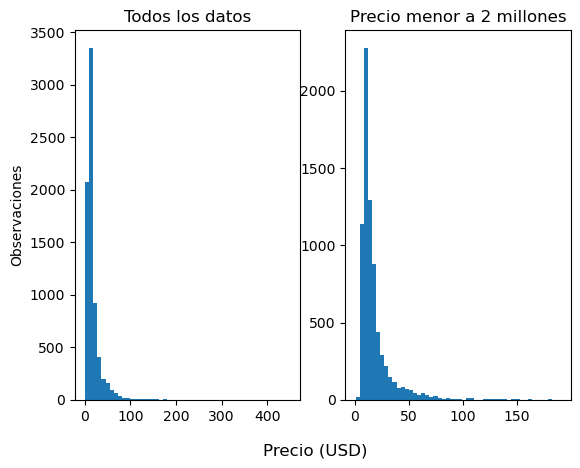

In [42]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(df['DOLARES'], bins=50)
axs[0].set_title('Todos los datos')
axs[0].set_ylabel('Observaciones')
axs[1].hist(df['DOLARES'][df['DOLARES'] < 200], bins=50)
axs[1].set_title('Precio menor a 2 millones')

plt.suptitle('Precio (USD)', x=0.5, y=0.02, ha='center')

En el ***histograma izquierdo*** se aprecian todos los datos. Se puede ver que la mayor cantidad de observaciones se encuentran en el lado izquierdo, con un precio menor al millon.

En el ***histograma derecho*** se graficaron solo los datos con precio menor a dos millones de dolares. Se puede apreciar que la mayor cantidad de datos se encuentra dentro de este rango de precios.

Text(0.5, 1.0, 'Variación del precio en funcion del tamaño (M2 totales)')

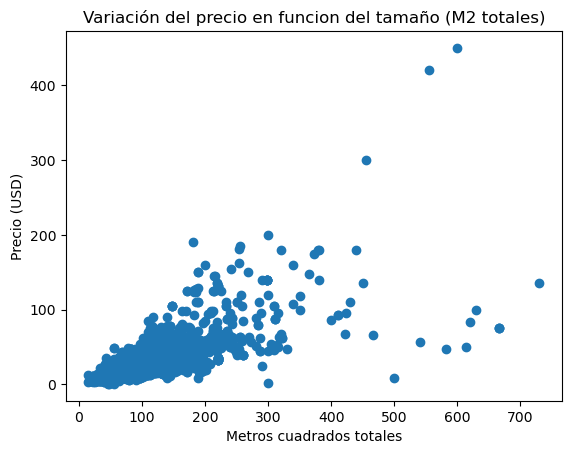

In [43]:
plt.scatter(df['M2'], df['DOLARES'])
plt.xlabel('Metros cuadrados totales')
plt.ylabel('Precio (USD)')
plt.title('Variación del precio en funcion del tamaño (M2 totales)')

Al examinar la variación del precio en función de los metros cuadrados se puede observar una correlación positiva entre el precio y los metros cuadrados de la vivienda hasta un cierto tamaño. Luego, a excepción por algunas viviendas puntuales, parece que el tamaño deja de influir significativamente en el valor de la propiedad.

Text(0.5, 1.0, 'Variación del precio según cantidad de baños')

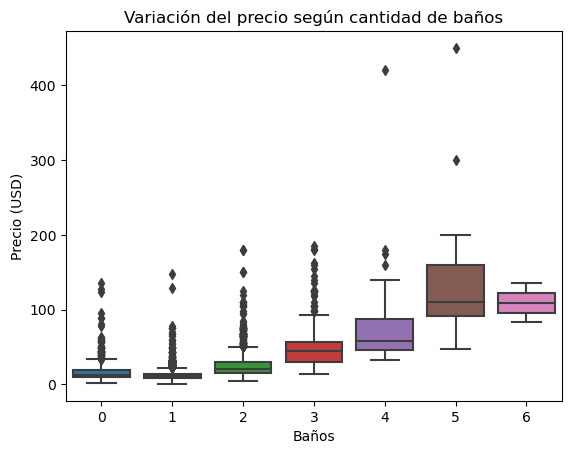

In [44]:
sns.boxplot(x='BAÑOS', y='DOLARES', data=df)

plt.xlabel('Baños')
plt.ylabel('Precio (USD)')
plt.title('Variación del precio según cantidad de baños')


Se puede ver un incremento en el precio de la vivienda a medida que incrementa la cantidad de baños.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'PALERMO'),
  Text(1, 0, 'BELGRANO'),
  Text(2, 0, 'VILLA CRESPO'),
  Text(3, 0, 'SAAVEDRA'),
  Text(4, 0, 'ALMAGRO'),
  Text(5, 0, 'VILLA URQUIZA'),
  Text(6, 0, 'NUÑEZ'),
  Text(7, 0, 'COLEGIALES'),
  Text(8, 0, 'CABALLITO'),
  Text(9, 0, 'BALVANERA'),
  Text(10, 0, 'PUERTO MADERO'),
  Text(11, 0, 'RETIRO'),
  Text(12, 0, 'MONSERRAT'),
  Text(13, 0, 'VILLA DEVOTO'),
  Text(14, 0, 'FLORES'),
  Text(15, 0, 'SAN CRISTOBAL'),
  Text(16, 0, 'MONTE CASTRO'),
  Text(17, 0, 'COGHLAN'),
  Text(18, 0, 'PARQUE PATRICIOS'),
  Text(19, 0, 'RECOLETA'),
  Text(20, 0, 'VILLA SANTA RITA'),
  Text(21, 0, 'BOEDO'),
  Text(22, 0, 'CHACARITA'),
  Text(23, 0, 'SAN NICOLAS'),
  Text(24, 0, 'VERSALLES'),
  Text(25, 0, 'PARQUE CHACABUCO'),
  Text(26, 0, 'VILLA LURO'),
  Text(27, 0, 'BARRACAS'),
  

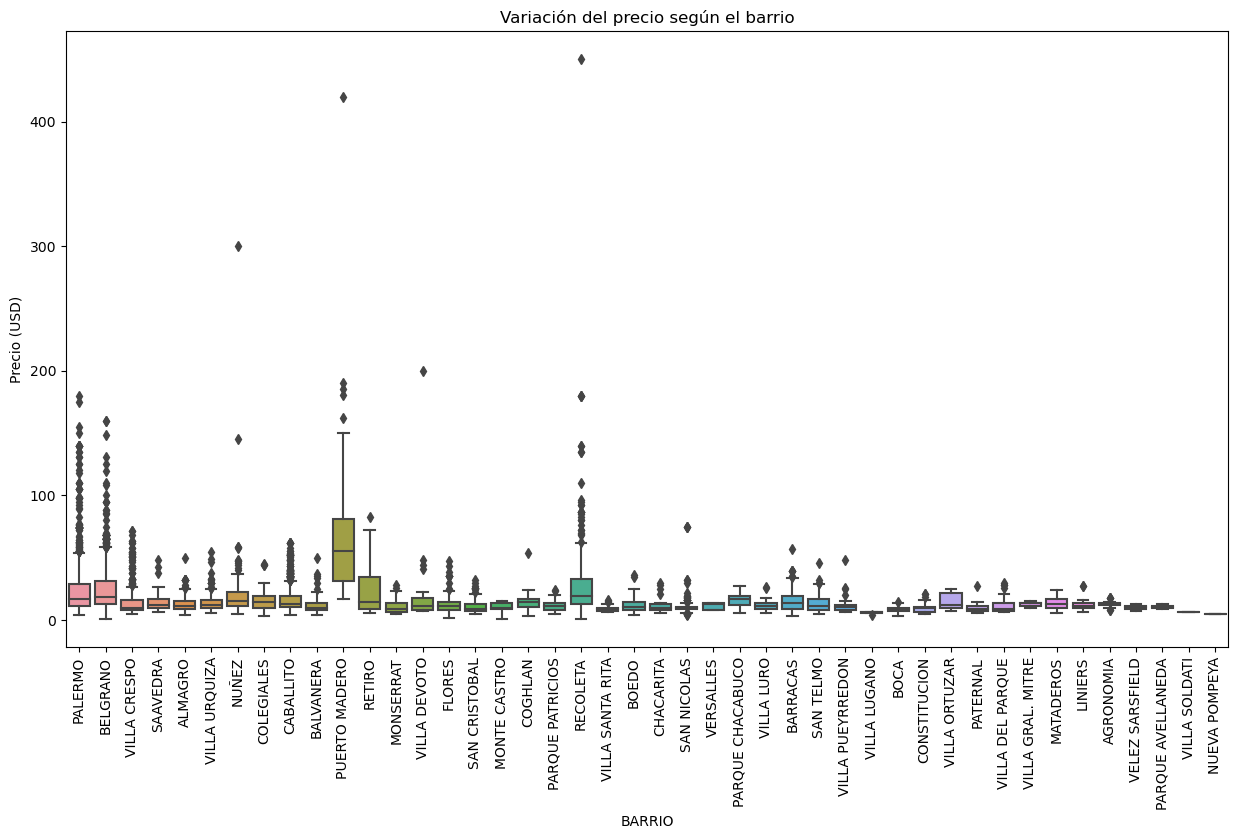

In [45]:
plt.figure(figsize=(15, 8)) 

sns.boxplot(x='BARRIO', y='DOLARES', data=df)

plt.xlabel('BARRIO')
plt.ylabel('Precio (USD)')
plt.title('Variación del precio según el barrio')

plt.xticks(rotation=90)

Algunos barrios puntuales se destacan por tener viviendas con precios más elevados.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '10')])

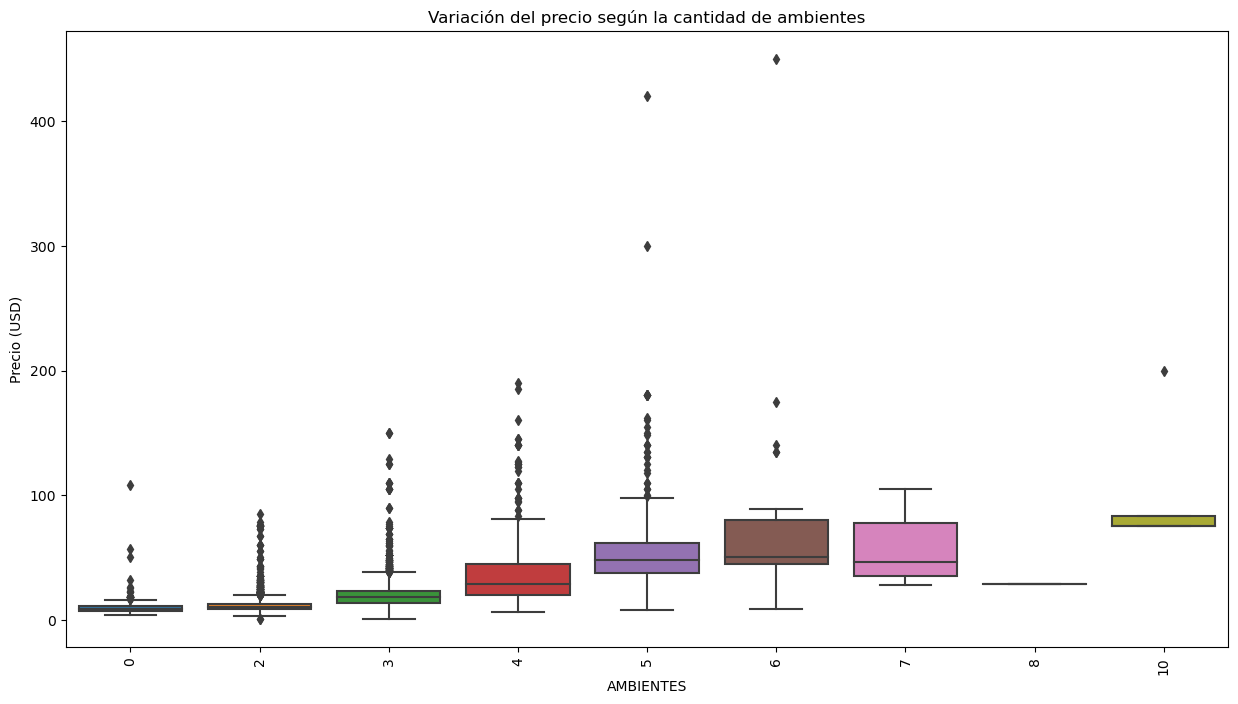

In [46]:
plt.figure(figsize=(15, 8))  

sns.boxplot(x='AMBIENTES', y='DOLARES', data=df)

plt.xlabel('AMBIENTES')
plt.ylabel('Precio (USD)')
plt.title('Variación del precio según la cantidad de ambientes')

plt.xticks(rotation=90)

Se aprecia una correlación positiva entre el precio de la vivienda y la cantidad de ambientes.

Text(0.5, 1.0, 'Matriz de correlación entre variables relevantes')

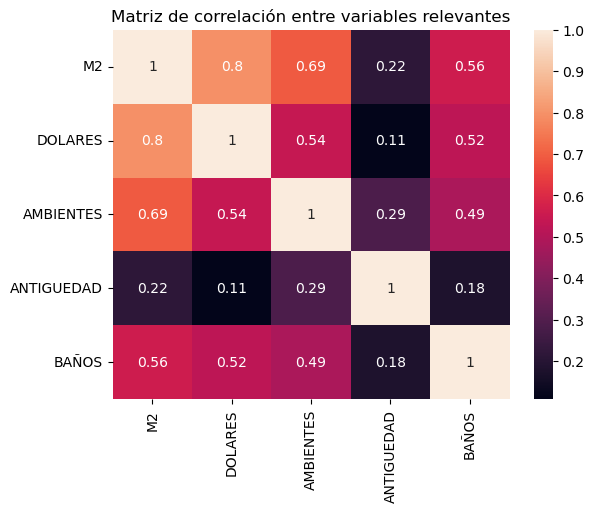

In [47]:
sns.heatmap(df.drop('BARRIO', axis = 1).corr(), annot=True)
plt.title('Matriz de correlación entre variables relevantes')

Al graficar una matriz de correlación entre diferentes variables, se aprecia una dependencia entre los metros cuadrados cubiertos y los metros cuadrados totales con el precio de la vivienda. En menor medida, se puede observar una correlación entre este último y los ambientes y baños de la propiedad.

<h2 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📝 Insights análisis exploratorio</h2>

<br>

<div style="background-color: #f9fcae; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 16px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">A partir del análisis exploratorio de datos se puede concluir que: <br>
    - El precio de la vivienda incrementa a medida que incrementan los m2 totales hasta cierto punto a partir del cual el tamaño de la vivienda deja de influir. <br>
    - El precio de la vivienda incrementa conforme aumenta la cantidad de baños. <br>
    - El precio de la vivienda incrementa conforme aumenta la cantidad de ambientes. <br>
    - Hay ciertos barrios que exhiben precios elevados. Puerto Madero evidencia los mayores valores. Otros barrios con precios altos son: Recoleta, Belgrano y Palermo.
    </p>
</div>

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Modelado</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Con el objetivo de predecir el precio de nuevas viviendas en el sistema, se generaron dos modelo de aprendizaje automático. La variable a predecir es el precio en dolares, una variable númerica continua, por lo que el problema es de regresión. Los modelos generados fueron:
        <br>
        - Regresión Lineal
        <br>
        - Red Neuronal
    </p>
</div>

#### Transformación a variables numéricas

Las variables del tipo str no pueden ser interpretadas por los modelos de Machine Learning y deben ser transformadas a variables numericas. Para esto, se usa la estrategia de cream variables dummies.

In [48]:
df = pd.get_dummies(data=df, columns=['BARRIO'])

#### Separación variables predictoras y objetivo
Se separan las variables en variable objetivo (y) y variables predictoras (x). En este caso, la variable DOLARES, el precio en dolares de las propiedades, es la variable objetivo.

In [51]:
x = df.drop('DOLARES', axis=1)  # Se eliminan las columnas 'DOLARES'
y = df['DOLARES']

#### División en entrenamiento y prueba
Se divide el dataset en conjunto de entrenamiento, para entrenar el modelo y conjunto de prueba, para evaluar el desempeño del modelo entrenado.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

print("Forma de x_train:", x_train.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de x_train: (5924, 48)
Forma de x_test: (1482, 48)
Forma de y_train: (5924,)
Forma de y_test: (1482,)


#### Normalización de datos

Se aplica un algoritmo de normalización de datos. StandardScaler usa z-score para que las observaciones tengan una media de 0 y desviación de 1. Solo se normalizan variables continuas y no categóricas resultantes de la codificación One Hot.

In [53]:
#Se obtienen las variables a normalizar
to_normalize_test = x_test[['M2', 'AMBIENTES', 'ANTIGUEDAD','BAÑOS']]
to_normalize_train = x_train[['M2', 'AMBIENTES', 'ANTIGUEDAD','BAÑOS']]

#Se instancia el scaler y se ajusta a los datos de entrenamiento sin variables One Hot
scaler = StandardScaler()
scaler.fit(to_normalize_train)

#Se aplica normalización
x_train_normalized = scaler.transform(to_normalize_train)
x_test_normalized = scaler.transform(to_normalize_test)

#Se eliminan variables sin normalizar de los conjuntos originales
x_train = x_train.drop(['M2', 'AMBIENTES', 'ANTIGUEDAD','BAÑOS'], axis=1)
x_test = x_test.drop(['M2', 'AMBIENTES', 'ANTIGUEDAD','BAÑOS'], axis=1)

#Se concatena las variables nomalizadas en el dataframe original
x_train = np.concatenate((x_train_normalized, x_train.values), axis=1)
x_test = np.concatenate((x_test_normalized, x_test.values), axis=1)

#### Regresión lineal

In [54]:
np.random.seed(42)
modelo_regresion = LinearRegression()
modelo_regresion.fit(x_train, y_train)
y_pred = modelo_regresion.predict(x_test)
y_pred_modelo = modelo_regresion.predict(x_train)
coef = modelo_regresion.coef_
b = modelo_regresion.intercept_

# Metricas del modelo
mse_modelo = mean_squared_error(y_pred_modelo, y_train)
mae_modelo = mean_absolute_error(y_pred_modelo, y_train)
r2_modelo = r2_score(y_pred_modelo, y_train)

print("Error Absoluto Medio del modelo:", mae_modelo)
print("Error Cuadrático Medio del modelo:", mse_modelo)
print("R^2 Score del modelo:", r2_modelo)


print('-----------------------------')
# Metricas de test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Error Absoluto Medio de datos de prueba:", mae)
print("Error Cuadrático Medio datos de prueba:", mse)
print("R^2 Score datos de prueba:", r2)

Error Absoluto Medio del modelo: 4.323688079724911
Error Cuadrático Medio del modelo: 101.14463426543014
R^2 Score del modelo: 0.6295720571686658
-----------------------------
Error Absoluto Medio de datos de prueba: 4.299488187166408
Error Cuadrático Medio datos de prueba: 82.30668030759173
R^2 Score datos de prueba: 0.7176693261601953


Text(0.5, 1.0, 'Peso de las variables del modelo en el precio predicho')

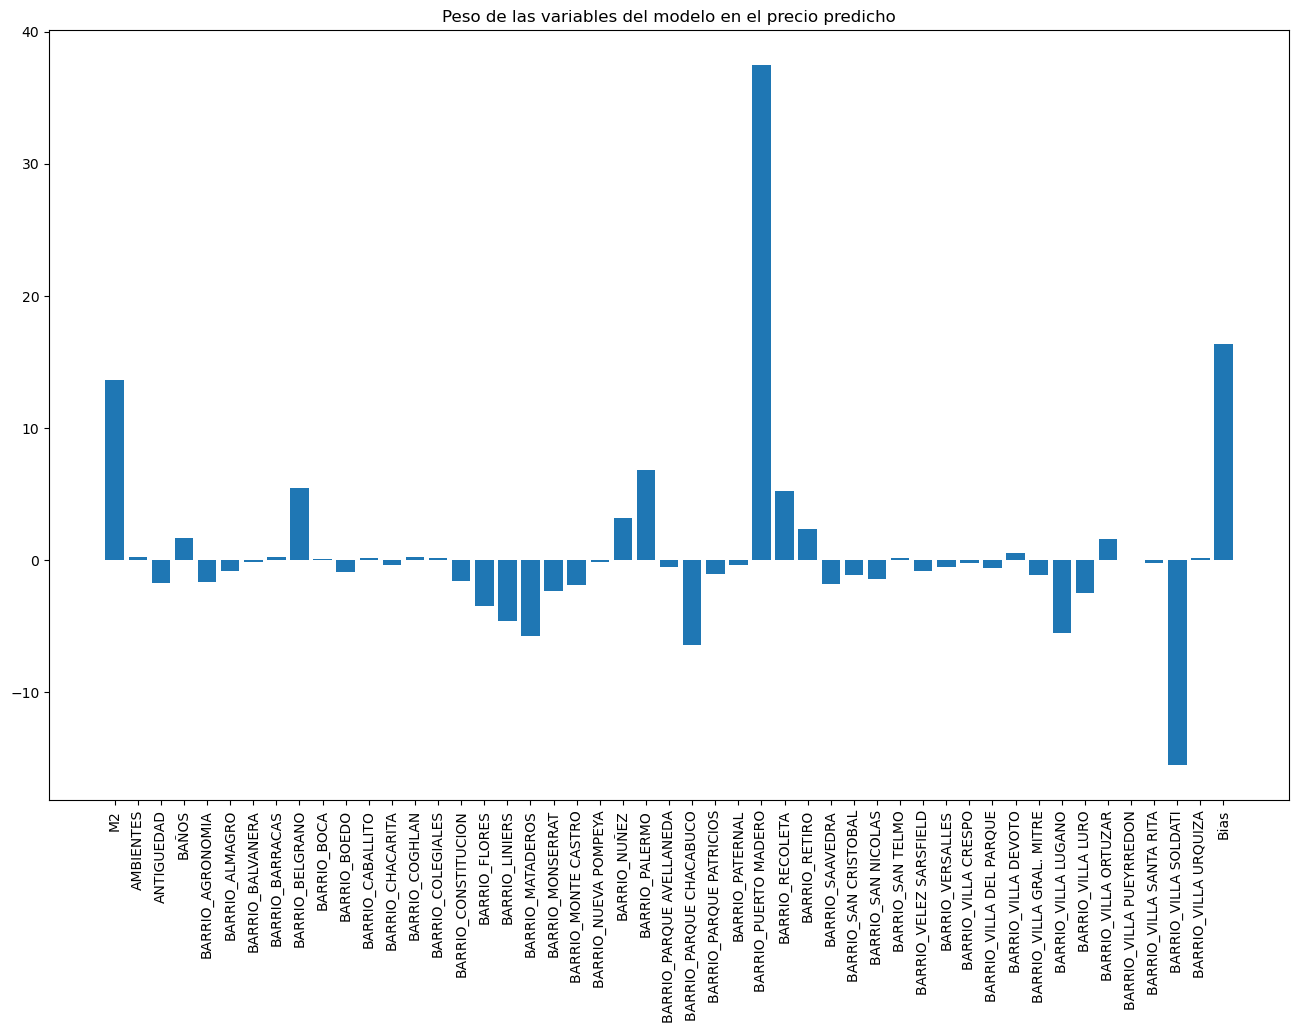

In [55]:
plt.figure(figsize=(16,10))
plt.bar(range(coef.shape[0] + 1 ), np.concatenate((coef,[b])) )
labels = df.drop('DOLARES', axis = 1).columns.values
labels = np.append(labels, 'Bias')

plt.xticks(range(coef.shape[0]+1), labels, rotation=90)
plt.title('Peso de las variables del modelo en el precio predicho')

#### Red Neuronal

In [56]:
LAYERS_SIZES = (100) ## LAYERS_SIZES= ( 16, 5)  cantidad de neuronas ocultas en cada capa
MAX_ITE = 2000
ALPHA_LEARNING = 0.005#learning_rate_init : double, optional, default 0.001
REG_ALPHA = 1e-60
fxsolver = 'adam'##, sgd, adam, lbfgs
TOLERANCE = 1e-5 #tol : float, optional, default 1e-4
ACT_FX = 'relu'#{identity, logistic, tanh, relu},

np.random.seed(42)
modelo_red = MLPRegressor(solver= fxsolver, 
                     hidden_layer_sizes=LAYERS_SIZES, 
                     tol= TOLERANCE, 
                     alpha= REG_ALPHA,
                     activation=ACT_FX,
                     max_iter=MAX_ITE)

modelo_red.fit(x_train, y_train)

y_pred_modelo = modelo_red.predict(x_train)
y_pred = modelo_red.predict(x_test)


# Metricas del modelo
mse_modelo = mean_squared_error(y_pred_modelo, y_train)
mae_modelo = mean_absolute_error(y_pred_modelo, y_train)
r2_modelo = r2_score(y_pred_modelo, y_train)

print("Error Absoluto Medio del modelo:", mae_modelo)
print("Error Cuadrático Medio del modelo:", mse_modelo)
print("R^2 Score del modelo:", r2_modelo)
print('-----------------------------')

# Metricas de test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Absoluto Medio de datos de prueba:", mae)
print("Error Cuadrático Medio datos de prueba:", mse)
print("R^2 Score datos de prueba:", r2)

Error Absoluto Medio del modelo: 2.6034534539926257
Error Cuadrático Medio del modelo: 33.26275634703756
R^2 Score del modelo: 0.9028695920894148
-----------------------------
Error Absoluto Medio de datos de prueba: 3.284931575622273
Error Cuadrático Medio datos de prueba: 62.867224526353574
R^2 Score datos de prueba: 0.7843510903776962


<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Conclusiones</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">
        A partir del dataset obtenido de los datos públicos del gobierno de la ciudad de Buenos Aires, se generaron dos modelos de aprendizaje automatico, con el objetivo de predecir el precio de venta en dolares de viviendas en CABA. <br>
        Durante el análisis exploratorio de datos, se observó que el precio esta correlacionado positivamente en mayor proporción con el tamaño en metros cuadrados de la vivienda y en menor medida, con el tamaño de baños y habitaciones. Adicionalmente, se aprecian diferencias entre los precios de distintos barrios.
   <br> 
        <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Los resultados de los modelos generados se resumen a continuación:
   </p>
    <table style="width: 100%; border-collapse: collapse;">
        <thead>
            <tr>
                <th style="border: 1px solid #3A405A; padding: 8px;">Modelo</th>
                <th style="border: 1px solid #3A405A; padding: 8px;">MAE</th>
                <th style="border: 1px solid #3A405A; padding: 8px;">R2</th>
                <th style="border: 1px solid #3A405A; padding: 8px;">MAE / Precio promedio</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid #3A405A; padding: 8px;">Regresión</td>
                <td style="border: 1px solid #3A405A; padding: 8px;">4.29</td>
                <td style="border: 1px solid #3A405A; padding: 8px;">0.72</td>
                <td style="border: 1px solid #3A405A; padding: 8px;">23%</td>
            </tr>
            <tr>
                <td style="border: 1px solid #3A405A; padding: 8px;">Red Neuronal</td>
                <td style="border: 1px solid #3A405A; padding: 8px;">3.28</td>
                <td style="border: 1px solid #3A405A; padding: 8px;">0.78</td>
                <td style="border: 1px solid #3A405A; padding: 8px;">18%</td>
            </tr>
        </tbody>
    </table>
    

<h4 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #3A405A;"> Regresión</h4> 
<p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">
    El modelo de regresión lineal obtuvo un desempeño aceptable, con un error 42900 dolares, que representa un 23% del precio de una casa promedio. Al estudiar graficamente las variables que mas influyen en el modelo, se observa que el tamaño de la propiedad es la variable que más peso tiene en el modelo. Adicionalmente, algunos barrios pueden influir significativamente en el precio de la vivienda de manera positiva o negativa. Por ejemplo, una casa localizada en Puerto Madero tendria un mayor precio que una en Villa Soldati.
</p>

<h4 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #3A405A;"> Red Neuronal</h4> 
<p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">
    Al realizar una predicción de precios utilizando una red neuronal, se mejoró el desempeño del modelo. El z-score de la red es de 0.78 y el error medio promedio es de 32800 dolares, lo que representa un 18% de error en el precio de una casa promedio. 
</p>
  
</div>
